In [289]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import concordance_index

import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
f = '/Users/hymaroshinigompa/Documents/DS_Projects/Cancer_Survival-Analysis/Breast Cancer METABRIC.csv'
df = pd.read_csv(f)
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,Positive,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2.540,BRCA,NaN,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,Positive,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,4.560,BRCA,NaN,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [291]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', 'Patient's Vital Status'], dtype='object')

In [292]:
df.shape

(2509, 34)

In [293]:
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

In [294]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [295]:
df["Overall Survival Status"]
df['Overall Survival Status'].unique()

array(['Living', 'Deceased', nan], dtype=object)

In [296]:
df.dtypes

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         

In [297]:
df.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


## EDA of Dataset

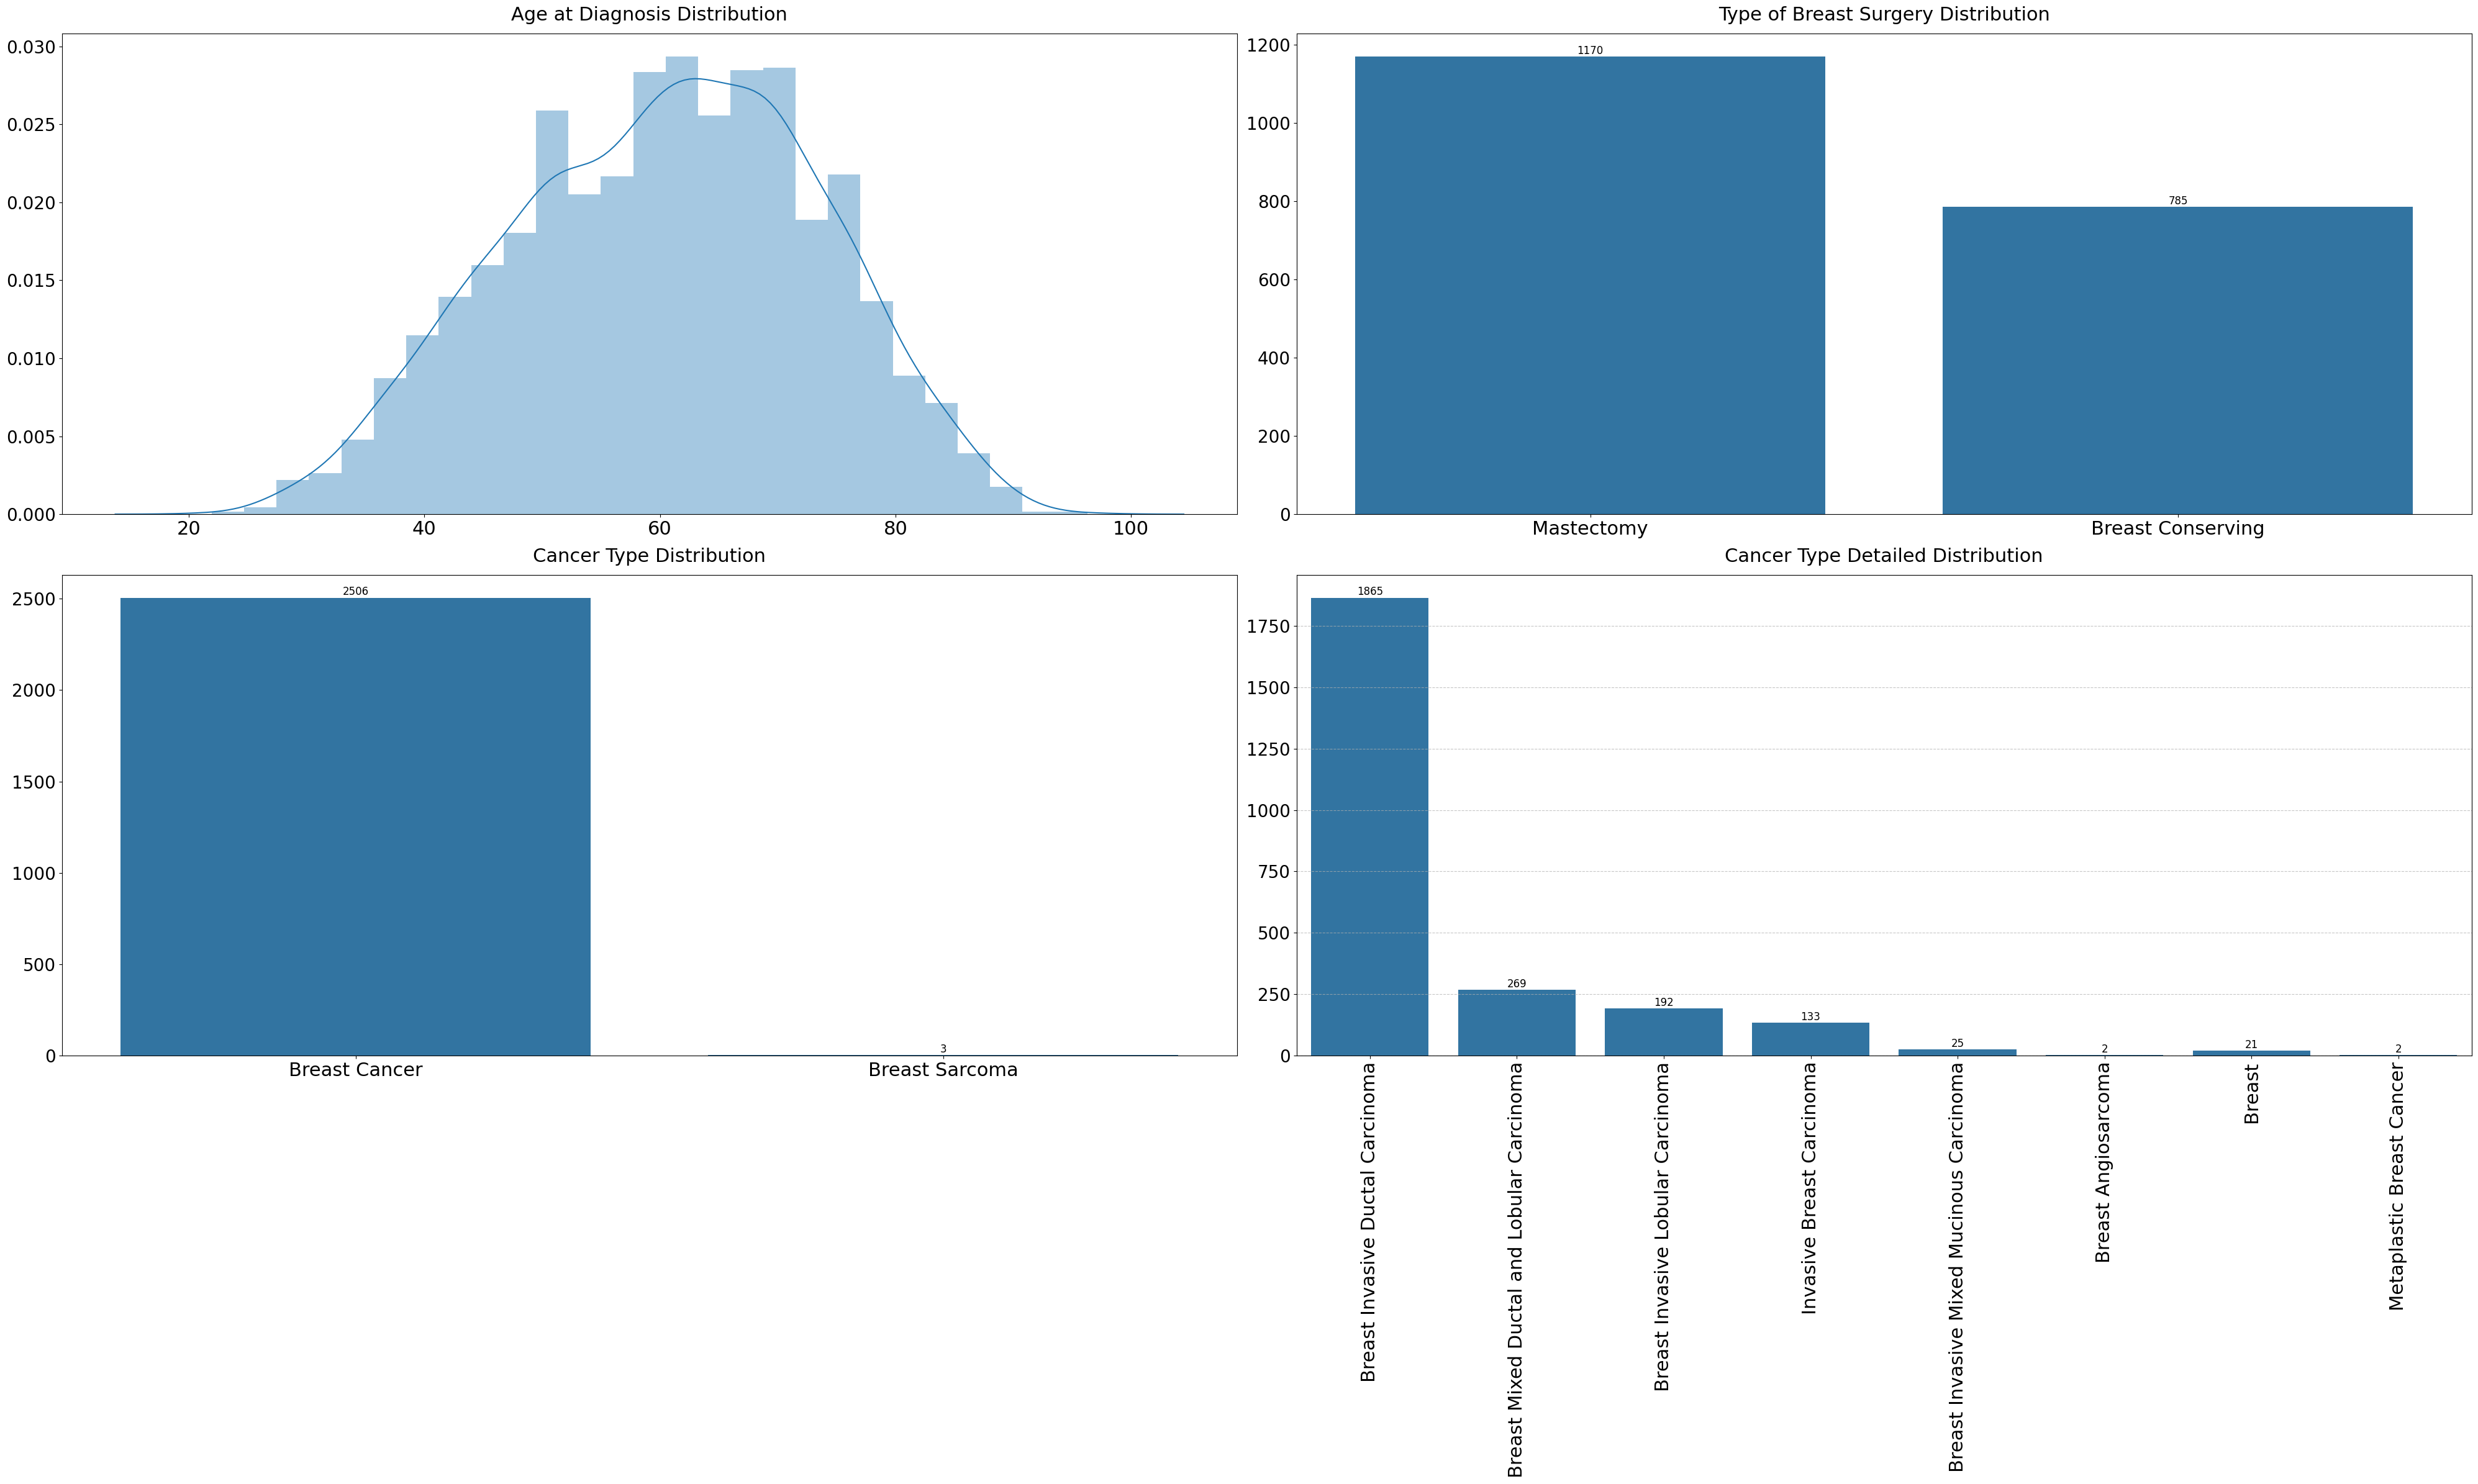

<Figure size 640x480 with 0 Axes>

In [298]:
fig, axes = plt.subplots(figsize=(40, 24), ncols=2, nrows=2)

#used to plot the distribution of a continuous variable.
sns.distplot(df['Age at Diagnosis'], ax=axes[0][0])

#used to create a bar plot showing the counts of unique values in a categorical variable.

sns.countplot(x='Type of Breast Surgery', data=df, ax=axes[0][1])
for p in axes[0][1].patches:
    axes[0][1].text(p.get_x() + p.get_width() / 2., p.get_height() + 0.1,
                    f'{int(p.get_height())}', ha='center', va='bottom', fontsize=12)

# Cancer Type Countplot
sns.countplot(x='Cancer Type', data=df, ax=axes[1][0])
for p in axes[1][0].patches:
    axes[1][0].text(p.get_x() + p.get_width() / 2., p.get_height() + 0.1,
                    f'{int(p.get_height())}', ha='center', va='bottom', fontsize=12)

# Cancer Type Detailed Countplot
sns.countplot(x='Cancer Type Detailed', data=df, ax=axes[1][1])
for p in axes[1][1].patches:
    axes[1][1].text(p.get_x() + p.get_width() / 2., p.get_height() + 0.1,
                    f'{int(p.get_height())}', ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels for the Cancer Type Detailed plot
axes[1][1].tick_params(axis='x', rotation=45)

# Add horizontal gridlines for better readability
axes[1][1].yaxis.grid(True, linestyle='--', alpha=0.7)

# Apply customizations
for i in range(2):
    for j in range(2):
        # Special adjustment for the bottom-right subplot
        if i == 1 and j == 1:
            axes[i][j].tick_params(axis='x', labelsize=22, rotation=90)
        else:
            axes[i][j].tick_params(axis='x', labelsize=22)
        axes[i][j].tick_params(axis='y', labelsize=20)
        
        # Remove axis labels
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')

# Set titles for each subplot
axes[0][0].set_title('Age at Diagnosis Distribution', size=22, pad=15)
axes[0][1].set_title('Type of Breast Surgery Distribution', size=22, pad=15)
axes[1][0].set_title('Cancer Type Distribution', size=22, pad=15)
axes[1][1].set_title('Cancer Type Detailed Distribution', size=22, pad=15)

# Show the plot
plt.tight_layout()
plt.show()

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


There are 2,509 unique breast cancer patients in METABRIC dataset as mentioned above. Those patients are diagnosed at ages between 21.9-96.3 and their mean diagnosis age is 60.4. Patients had underwent to two different surgeries; Mastectomy (removal of all breast tissue from a breast) or Breast-conserving surgery (removal of a part of the breast that has cancer). There are 2,506 breast cancer and 3 breast sarcoma patients in the dataset since breast sarcomas are a very rare form of breast cancer, that cover fewer than 1% of all breast cancers. The most common histological subtype of the breast cancer is invasive ductal carcinoma (IDC) with 1865 occurences. IDC is the most common form of breast cancer, representing 80% of all breast cancer diagnoses. Those indicators show that this dataset reflects real world scenarios very accurately.

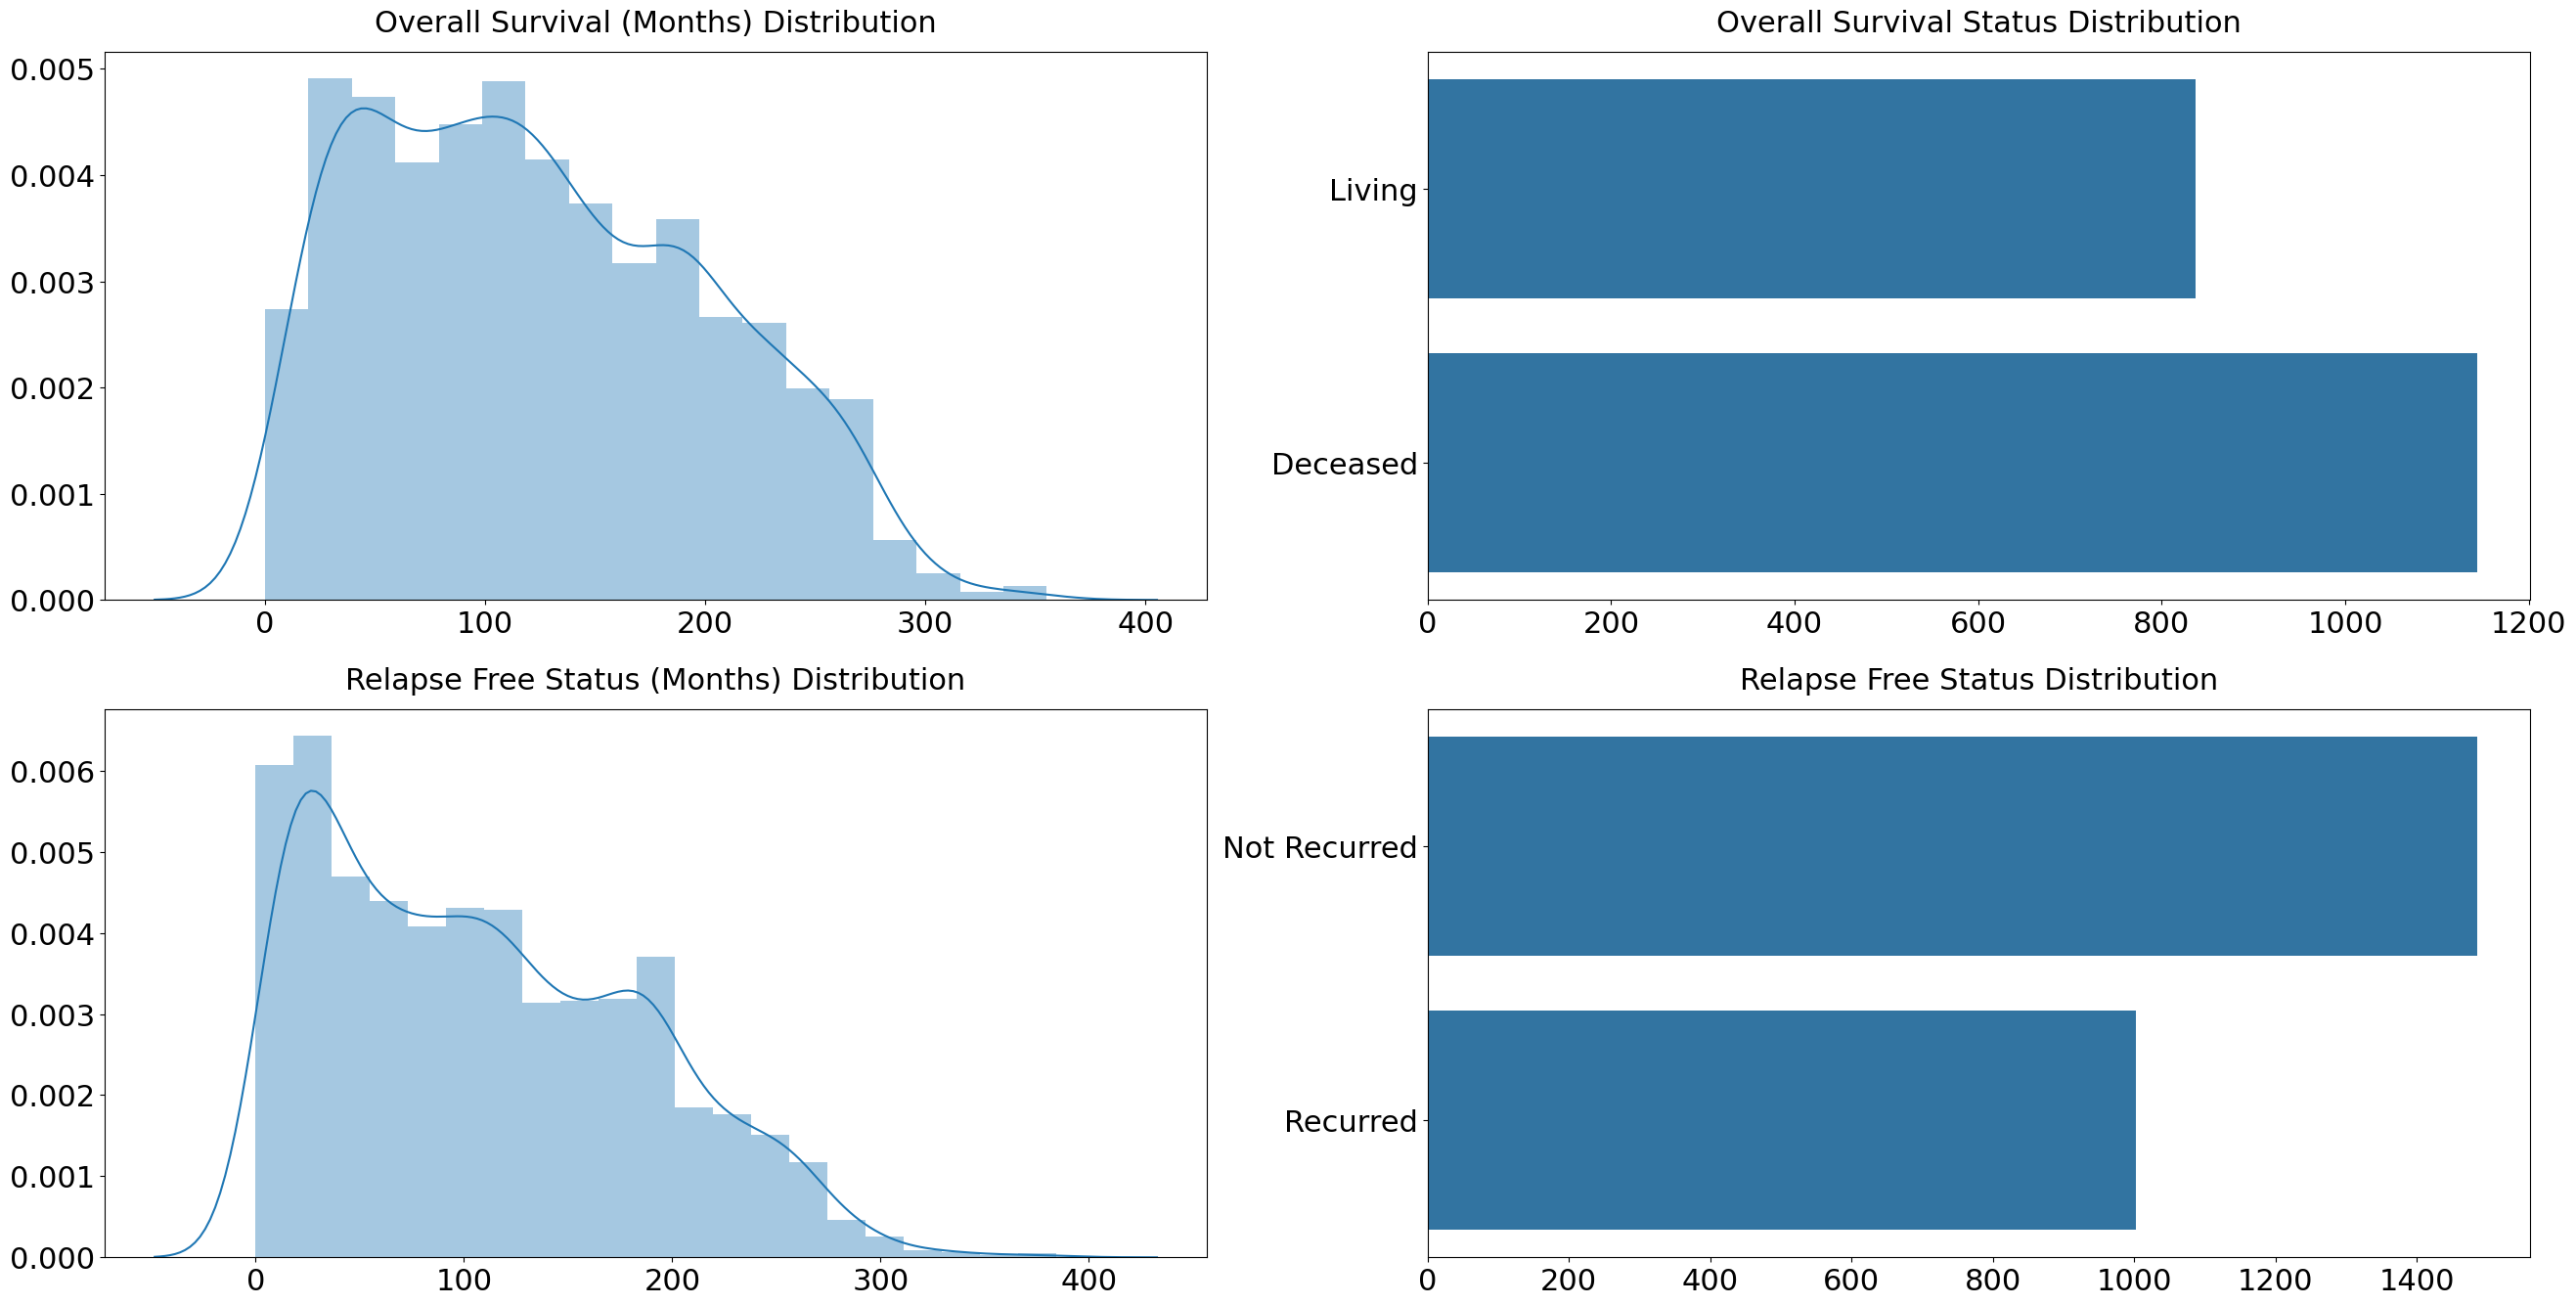

In [299]:
fig, axes = plt.subplots(figsize=(32, 16), ncols=2, nrows=2)

sns.distplot(df['Overall Survival (Months)'], ax=axes[0][0])
sns.countplot(df['Overall Survival Status'], ax=axes[0][1])
sns.distplot(df['Relapse Free Status (Months)'], ax=axes[1][0])
sns.countplot(df['Relapse Free Status'], ax=axes[1][1])

for i in range(2):
    for j in range(2):
        if i == 1 and j == 1:
            axes[i][j].tick_params(axis='x', labelsize=22)
        else:
            axes[i][j].tick_params(axis='x', labelsize=22)
        axes[i][j].tick_params(axis='y', labelsize=22)
        
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')
        
axes[0][0].set_title('Overall Survival (Months) Distribution', size=22, pad=15)
axes[0][1].set_title('Overall Survival Status Distribution', size=22, pad=15)
axes[1][0].set_title('Relapse Free Status (Months) Distribution', size=22, pad=15)
axes[1][1].set_title('Relapse Free Status Distribution', size=22, pad=15)

plt.show()


There are two events listed in the dataset. Those events are survival (Overall Survival Status) and relapse (Relapse Free Status). There are also two durations associated with those events which are Overall Survival (Months) and Relapse Free Status (Months). Survival analysis is based on those two events and their durations. Both of the durations follow very similar distributions, but distribution of events are slightly different. For survival event, "Deceased" label is more common that corresponds to event happened, but in relapse event "Not Recurred" label is more common and that corresponds to event didn't happen.

In [300]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


Other features in the dataset are clinical profiles of the patients. Those features consist of tumor cellularity, whether the patient had taken chemotherapy, hormone therapy, radio therapy or not, ER, PR, HER2 status, tumor histologic subtype, size, stage and etc. Those features can be used as covariates in survival analysis models, but they require extra preprocessing and cleaning.

In [301]:
#identifying the missing values
missing_values = df.isnull().sum()
missing_values_sorted = missing_values.sort_values()

print(missing_values_sorted)


Patient ID                          0
Oncotree Code                       0
Cancer Type                         0
Cancer Type Detailed                0
Sex                                 0
Age at Diagnosis                   11
Cohort                             11
Relapse Free Status                21
ER Status                          40
ER status measured by IHC          83
Neoplasm Histologic Grade         121
Relapse Free Status (Months)      121
Tumor Other Histologic Subtype    135
Tumor Size                        149
Mutation Count                    152
Nottingham prognostic index       222
Lymph nodes examined positive     266
Overall Survival Status           528
Overall Survival (Months)         528
Radio Therapy                     529
PR Status                         529
Inferred Menopausal State         529
Integrative Cluster               529
Hormone Therapy                   529
HER2 Status                       529
HER2 status measured by SNP6      529
Pam50 + Clau

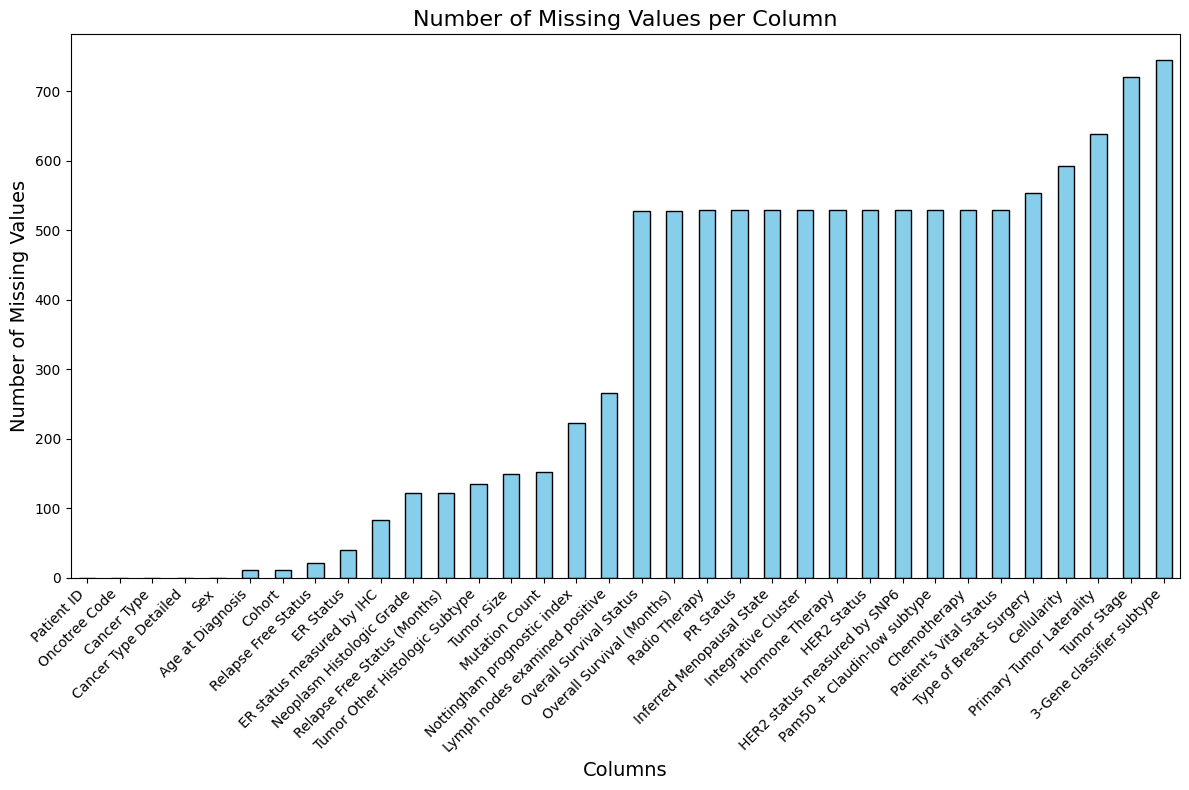

In [302]:
#plotting the missing values
plt.figure(figsize=(12, 8))
missing_values_sorted.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Number of Missing Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()

There are 29 columns with missing values and only 5 columns don't have missing values in them. Those columns are Sex, Cancer Type Detailed, Cancer Type, Oncotree Code, and Patient ID. Cancer Type and Cancer Type Detailed can be very useful for imputation, but others don't yield any information.

### Handling missing values

In [303]:
import pandas as pd

# Define a function to calculate mode and fill NaNs
def fill_na_with_mode(series):
    mode_value = series.mode()
    mode_value = mode_value.iloc[0] if not mode_value.empty else None
    return series.fillna(mode_value)

# Define a function to get mode and handle empty cases
def get_mode(series):
    mode_value = series.mode()
    return mode_value.iloc[0] if not mode_value.empty else None

# Impute missing values for each column based on the given strategy

# Event and Duration Columns
df['Relapse Free Status'] = df.groupby('Cancer Type Detailed')['Relapse Free Status'].transform(lambda x: fill_na_with_mode(x))
df['Relapse Free Status (Months)'] = df.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].transform(lambda x: x.fillna(x.mean()))
df['Overall Survival Status'] = df.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Overall Survival Status'].transform(lambda x: fill_na_with_mode(x))
df['Overall Survival (Months)'] = df.groupby(['Cancer Type Detailed', 'Overall Survival Status'])['Overall Survival (Months)'].transform(lambda x: x.fillna(x.mean()))

# ER, PR, HER2 Status Columns
df['ER status measured by IHC'] = fill_na_with_mode(df['ER status measured by IHC'])
df['ER Status'] = df.groupby('ER status measured by IHC')['ER Status'].transform(lambda x: fill_na_with_mode(x))
df['HER2 status measured by SNP6'] = fill_na_with_mode(df['HER2 status measured by SNP6'])
df['HER2 Status'] = df.groupby('HER2 status measured by SNP6')['HER2 Status'].transform(lambda x: fill_na_with_mode(x))
df['PR Status'] = df.groupby('Cancer Type Detailed')['PR Status'].transform(lambda x: fill_na_with_mode(x))

# Chemotherapy, Hormone Therapy, Radio Therapy Columns
df['Chemotherapy'] = df.groupby('Cancer Type Detailed')['Chemotherapy'].transform(lambda x: fill_na_with_mode(x))
df['Hormone Therapy'] = df.groupby('Cancer Type Detailed')['Hormone Therapy'].transform(lambda x: fill_na_with_mode(x))
df['Radio Therapy'] = df.groupby('Cancer Type Detailed')['Radio Therapy'].transform(lambda x: fill_na_with_mode(x))

# Other Columns
df['Age at Diagnosis'] = df.groupby('Cancer Type Detailed')['Age at Diagnosis'].transform(lambda x: x.fillna(x.mean()))
df['Cohort'] = df.groupby('Cancer Type Detailed')['Cohort'].transform(lambda x: x.fillna(x.median()))
df['Cellularity'] = df.groupby('Cancer Type Detailed')['Cellularity'].transform(lambda x: fill_na_with_mode(x))
df['Tumor Stage'] = df.groupby(['Cancer Type Detailed', 'Cellularity'])['Tumor Stage'].transform(lambda x: x.fillna(x.median()))
df['Tumor Size'] = df.groupby(['Cancer Type Detailed', 'Tumor Stage'])['Tumor Size'].transform(lambda x: x.fillna(x.median()))
df['Tumor Size'] = fill_na_with_mode(df['Tumor Size'])




mode_per_group: Calculates the mode for each group and returns a series indexed by 'Cancer Type Detailed'.
mode_filled: Maps the calculated mode to the corresponding rows in the DataFrame, aligning the index correctly.
fillna: Fills missing values with the mode of the group and, if any NaN values remain, fills them with the overall mode.

In [304]:
""" # Calculate the mode for each group
mode_per_group = df.groupby('Cancer Type Detailed')['Neoplasm Histologic Grade'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Align the index of the mode with the original DataFrame's index
mode_filled = df['Cancer Type Detailed'].map(mode_per_group)

# Fill missing values within each group with the group's mode
df['Neoplasm Histologic Grade'] = df['Neoplasm Histologic Grade'].fillna(mode_filled)

# If there are still any missing values, fill them with the overall mode of the column
overall_mode = df['Neoplasm Histologic Grade'].mode().iloc[0]
df['Neoplasm Histologic Grade'] = df['Neoplasm Histologic Grade'].fillna(overall_mode) """


" # Calculate the mode for each group\nmode_per_group = df.groupby('Cancer Type Detailed')['Neoplasm Histologic Grade'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)\n\n# Align the index of the mode with the original DataFrame's index\nmode_filled = df['Cancer Type Detailed'].map(mode_per_group)\n\n# Fill missing values within each group with the group's mode\ndf['Neoplasm Histologic Grade'] = df['Neoplasm Histologic Grade'].fillna(mode_filled)\n\n# If there are still any missing values, fill them with the overall mode of the column\noverall_mode = df['Neoplasm Histologic Grade'].mode().iloc[0]\ndf['Neoplasm Histologic Grade'] = df['Neoplasm Histologic Grade'].fillna(overall_mode) "

In [305]:
""" # Calculate the mode for each group
mode_per_group = df.groupby('Cancer Type Detailed')['Primary Tumor Laterality'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Align the index of the mode with the original DataFrame's index
mode_filled = df['Cancer Type Detailed'].map(mode_per_group)

# Fill missing values within each group with the group's mode
df['Primary Tumor Laterality'] = df['Primary Tumor Laterality'].fillna(mode_filled)

# If there are still any missing values, fill them with the overall mode of the column
overall_mode = df['Primary Tumor Laterality'].mode().iloc[0]
df['Primary Tumor Laterality'] = df['Primary Tumor Laterality'].fillna(overall_mode)
"""

" # Calculate the mode for each group\nmode_per_group = df.groupby('Cancer Type Detailed')['Primary Tumor Laterality'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)\n\n# Align the index of the mode with the original DataFrame's index\nmode_filled = df['Cancer Type Detailed'].map(mode_per_group)\n\n# Fill missing values within each group with the group's mode\ndf['Primary Tumor Laterality'] = df['Primary Tumor Laterality'].fillna(mode_filled)\n\n# If there are still any missing values, fill them with the overall mode of the column\noverall_mode = df['Primary Tumor Laterality'].mode().iloc[0]\ndf['Primary Tumor Laterality'] = df['Primary Tumor Laterality'].fillna(overall_mode)\n"

In [306]:

def safe_mode(series):
    """Return the mode of the series, or NaN if empty."""
    mode_values = series.mode()
    return mode_values.iloc[0] if not mode_values.empty else np.nan

def fill_column(df, column, group_by=None, fill_value='mode', default_value=None):
    """Fill missing values in a column based on the specified strategy."""
    if group_by:
        # Calculate mode or median for each group
        if fill_value == 'mode':
            mode_per_group = df.groupby(group_by)[column].agg(lambda x: safe_mode(x))
        elif fill_value == 'median':
            mode_per_group = df.groupby(group_by)[column].median()
        
        # Map the calculated mode or median to fill the column
        df[column] = df.apply(
            lambda row: row[column] if pd.notna(row[column]) else mode_per_group[row[group_by]],
            axis=1
        )
    else:
        if fill_value == 'mode':
            df[column] = df[column].fillna(safe_mode(df[column]))
        elif fill_value == 'median':
            df[column] = df[column].fillna(df[column].median())
    
    if default_value is not None:
        df[column] = df[column].fillna(default_value)

def fill_missing_values(df):
    """Apply missing value imputation for specific columns."""
    fill_column(df, 'Neoplasm Histologic Grade', fill_value='mode')
    fill_column(df, 'Primary Tumor Laterality', group_by='Cancer Type Detailed', fill_value='mode')
    fill_column(df, 'Tumor Other Histologic Subtype', group_by='Cancer Type Detailed', fill_value='mode', default_value='Ductal/NST')
    fill_column(df, 'Mutation Count', group_by='Cancer Type Detailed', fill_value='mode')
    fill_column(df, 'Lymph nodes examined positive', group_by='Cancer Type Detailed', fill_value='mode')
    fill_column(df, 'Inferred Menopausal State', fill_value='mode')
    fill_column(df, 'Pam50 + Claudin-low subtype', group_by='Cancer Type Detailed', fill_value='mode')
    fill_column(df, 'Integrative Cluster', group_by='Cancer Type Detailed', fill_value='mode')
    fill_column(df, 'Type of Breast Surgery', group_by='Cancer Type Detailed', fill_value='mode')
    fill_column(df, '3-Gene classifier subtype', group_by='Cancer Type Detailed', fill_value='mode')

    # Special case for 'Nottingham prognostic index'
    df['Nottingham prognostic index'] = df.groupby('Tumor Size')['Nottingham prognostic index'].transform(lambda x: x.fillna(x.median()))
    df['Nottingham prognostic index'] = df['Nottingham prognostic index'].fillna(df['Nottingham prognostic index'].median())

# Usage
fill_missing_values(df)


In [307]:
df.drop(columns=["Patient's Vital Status"], inplace=True)

In [308]:
object_cols = ['Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity',
               'Chemotherapy', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'ER status measured by IHC',
               'ER Status', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype',
               'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality',
               'Oncotree Code', 'PR Status', 'Radio Therapy', 'Sex', '3-Gene classifier subtype']

for col in object_cols:
    df[col] = np.uint8(LabelEncoder().fit_transform(df[col]))
    
df['Overall Survival Status'] = np.uint8(df['Overall Survival Status'].map({'Living': 0, 'Deceased': 1}))
df['Relapse Free Status'] = np.uint8(df['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}))

At the final preprocessing stage, object type columns are label encoded and casted to uint8 for less memory consumption. Two event columns; Overall Survival Status and Relapse Free Status are manually encoded because LabelEncoder can label "event happened" as 0. This concludes the introduction part of this notebook, and makes the data prepared for the models.

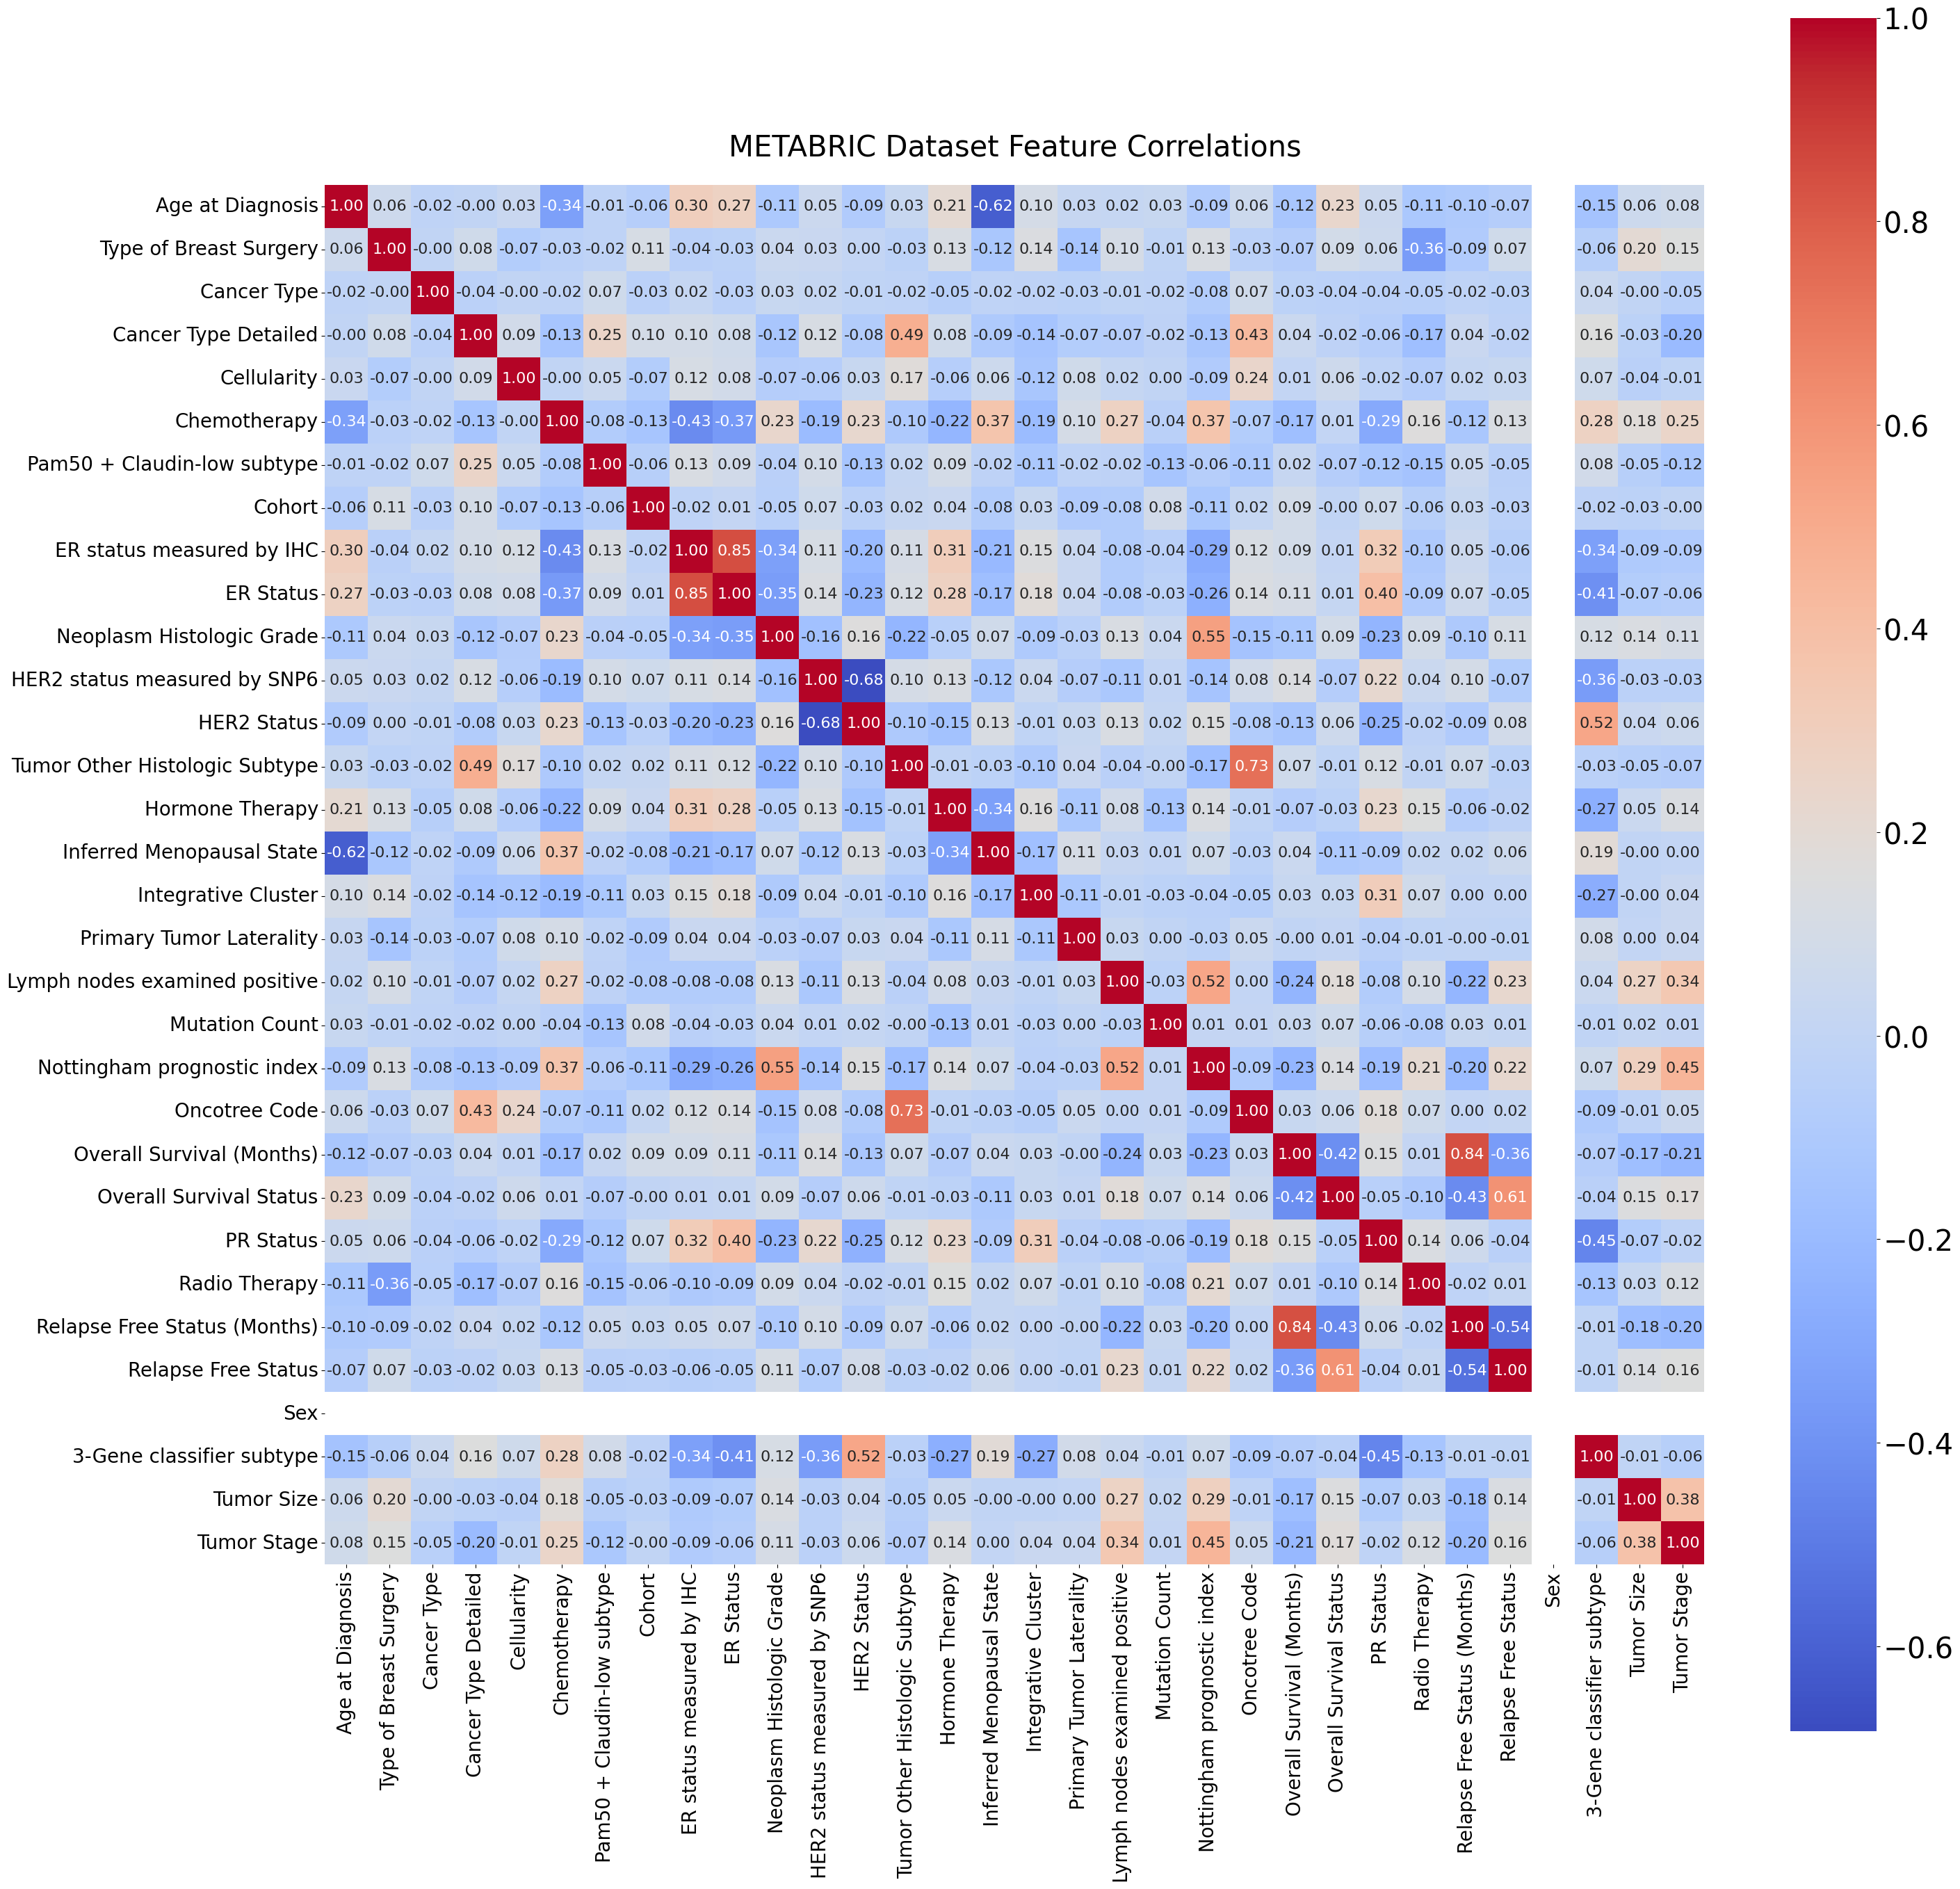

In [309]:
# List of columns to be included in correlation
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for only numeric columns
corr_matrix = df[numeric_cols].corr()

# Check for non-numeric values in columns that should be numeric
for col in numeric_cols:
    if df[col].apply(lambda x: isinstance(x, str)).any():
        print(f"Non-numeric values found in column: {col}")

# Check for non-numeric values in columns that should be numeric
for col in numeric_cols:
    if df[col].apply(lambda x: isinstance(x, str)).any():
        print(f"Non-numeric values found in column: {col}")

# Convert non-numeric values to NaN and then handle NaNs
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(32, 32), dpi=100)

ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 16}, fmt='.2f')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

plt.tick_params(axis='x', labelsize=20, rotation=90)
plt.tick_params(axis='y', labelsize=20, rotation=0)
plt.title('METABRIC Dataset Feature Correlations', size=30, pad=30)

plt.show()





Computes the correlation matrix for the DataFrame df_metabric. This matrix shows how each feature in the DataFrame is correlated with every other feature.

In [320]:
df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     stratify=df['Cancer Type Detailed'],
                                     shuffle=True,
                                     random_state=0)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
for fold, (_, val_idx) in enumerate(skf.split(df_train, df_train['Cancer Type Detailed']), 1):
    df_train.loc[val_idx, 'fold'] = fold

df_train['fold'] = df_train['fold'].astype(np.uint8)

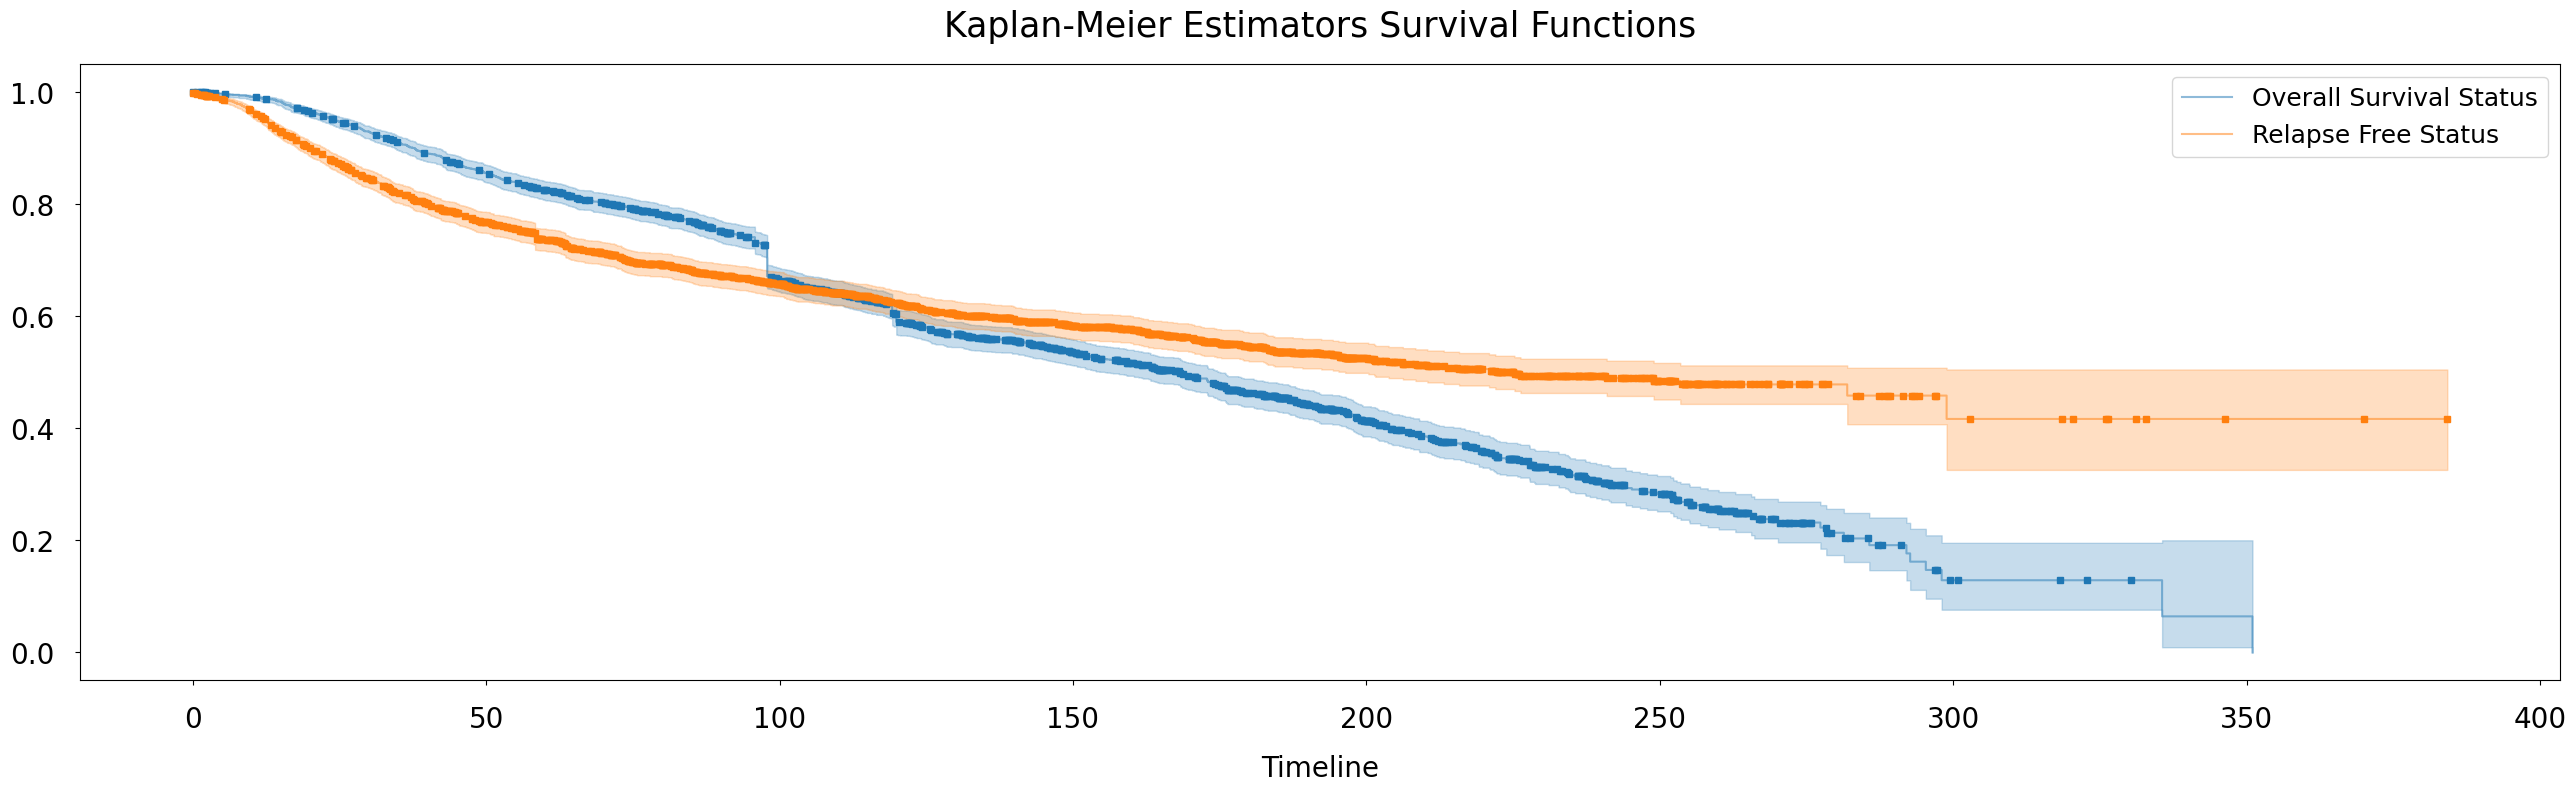

In [321]:

fig = plt.figure(figsize=(32, 8))

for time, event in zip(['Overall Survival (Months)', 'Relapse Free Status (Months)'], ['Overall Survival Status', 'Relapse Free Status']):
       
    T, E = df_train[time], df_train[event]
    kmf = KaplanMeierFitter()
    kmf.fit(T, E)
    kmf.plot(label=event, alpha=0.5, show_censors=True, censor_styles={'ms': 4, 'marker': 's'})
    
plt.xlabel('Timeline', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=20, pad=15)
plt.tick_params(axis='y', labelsize=20, pad=15)
plt.legend(prop={'size': 18})
plt.title('Kaplan-Meier Estimators Survival Functions', size=25, pad=20)

plt.show()

In [311]:
df['Cancer Type Detailed'].value_counts()

Cancer Type Detailed
2    1865
5     269
3     192
6     133
4      25
0      21
1       2
7       2
Name: count, dtype: int64

In [312]:
""""
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show() 

"""

'"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(10, 6))\nsns.heatmap(df.isnull(), cbar=False, cmap=\'viridis\')\nplt.show() \n\n'

In [313]:
#creating a df1 removing the unwanted features 
#the breast in the Cancer Type Detailed does not have any sense so removing it

df1 = df[df['Cancer Type Detailed'] != 'Breast']

#Grouping the rare cancer types 
rare_cancer_threshold = 5
rare_cancers = df1['Cancer Type Detailed'].value_counts()[df['Cancer Type Detailed'].value_counts() < rare_cancer_threshold].index
df1['Cancer Type Detailed'] = df['Cancer Type Detailed'].replace(rare_cancers, 'Other Rare Cancers')

# Drop rows with missing critical values
#df.dropna(subset=['Overall Survival (Months)', 'Overall Survival Status'], inplace=True)

In [314]:
df1['Cancer Type Detailed'].value_counts()

Cancer Type Detailed
2                     1865
5                      269
3                      192
6                      133
4                       25
0                       21
Other Rare Cancers       4
Name: count, dtype: int64

In [315]:
missing_status_proportion = df1['Overall Survival Status'].isna().mean()
print(f"Missing Status Proportion: {missing_status_proportion:.2%}")

Missing Status Proportion: 0.00%


In [316]:
#as the missing status is 21.06% i am considering it as censored
df1['Event'] = np.where(df1['Overall Survival Status'].isna(), 0, df1['Overall Survival Status'].apply(lambda x: 1 if x == 'Dead' else 0))

# Ensure that we drop any rows where both survival time and status are missing
df1 = df1.dropna(subset=['Overall Survival (Months)'])

df1.head()



,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Event
0,MB-0000,75.65,1,0,2,0,0,6,1.0,1,1,3.0,2,0,0,1,0,4,1,10.0,5.0,6.044,2,140.500000,0,0,1,138.65,0,0,2,22.0,2.0,0
1,MB-0002,43.19,0,0,2,0,0,2,1.0,1,1,3.0,2,0,0,1,1,4,1,0.0,2.0,4.020,2,84.633333,0,1,1,83.52,0,0,0,10.0,1.0,0
2,MB-0005,48.87,1,0,2,0,1,3,1.0,1,1,2.0,2,0,0,1,1,3,1,1.0,2.0,4.030,2,163.700000,1,1,0,151.28,1,0,0,15.0,2.0,0
3,MB-0006,47.68,1,0,5,2,1,3,1.0,1,1,2.0,2,0,4,1,1,10,1,3.0,1.0,4.050,6,164.933333,0,1,1,162.76,0,0,1,25.0,2.0,0
4,MB-0008,76.97,1,0,5,0,1,3,1.0,1,1,3.0,2,0,4,1,0,10,1,8.0,2.0,6.080,6,41.366667,1,1,1,18.55,1,0,0,40.0,2.0,0


In [317]:
# Convert categorical variables to appropriate format
df1['Cancer Type Detailed'] = df1['Cancer Type Detailed'].astype('category')
df1['ER Status'] = df1['ER Status'].astype('category')
df1['HER2 Status'] = df1['HER2 Status'].astype('category')

# Create dummy variables for categorical features if using Cox model
df1 = pd.get_dummies(df, drop_first=True)

df1.columns


Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status',
       ...
       'Patient ID_MTS-T2423', 'Patient ID_MTS-T2424', 'Patient ID_MTS-T2425', 'Patient ID_MTS-T2426', 'Patient ID_MTS-T2427', 'Patient ID_MTS-T2428', 'Patient ID_MTS-T2429', 'Patient ID_MTS-T2430', 'Patient ID_MTS-T2431', 'Patient ID_MTS-T2432'], dtype='object', length=2540)